In [36]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import histlite as hl
import csky as cy
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
mpl.rcParams['font.size'] = 20

In [3]:
ana_dir = cy.utils.ensure_dir('/home/jthwaites/csky_cache')

In [5]:
ana = cy.get_analysis(cy.selections.repo, 'version-002-p05', cy.selections.GFUDataSpecs.gfu_IC86, dir=ana_dir)

Setting up Analysis for:
GFU_for_2011_2012_2013_2014_2015_2016_2017_2018
Setting up GFU_for_2011_2012_2013_2014_2015_2016_2017_2018...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2011_MC.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2011_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2012_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2013_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2014_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2015_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2016_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2017_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2018_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/GRL/IC86_2011_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/GRL/IC86_2012_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/GRL/IC86_2013_data.npy ...
Reading /data/a

In [27]:
cy.CONF['ana'] = ana

In [15]:
frbs = pd.read_csv('./frbs_coord.csv')
frbs.head()

,frb_name,ra,dec
0,190907.J08+46,08:09,+46:16
1,FRB20180814A,04:22,+73:40
2,FRB20180908B,12:32,+74:12
3,FRB20180916B,01:58,+65:44
4,FRB20181017A,17:05,+68:17


In [24]:
#start with one frb first, then more later: FRB121102
frbs_coord = SkyCoord(ra=frbs['ra'], dec=frbs['dec'], unit=(u.hourangle, u.deg))
w=np.where(frbs['frb_name']=='FRB121102')
frbs_coord[w]

<SkyCoord (ICRS): (ra, dec) in deg
    [(83.0375, 33.08694444)]>

In [28]:
src = cy.sources(frbs_coord[w].ra, frbs_coord[w].dec, deg=True)
tr = cy.get_trial_runner(src=src)

In [29]:
#do bg trials and store
#`Chi2TSD` stores the trials as well as a $\chi^2$ fit to the nonzero part of the TS distribution
n_trials = 10000
bg = cy.dists.Chi2TSD(tr.get_many_fits(n_trials))

Performing 10000 background trials using 1 core:
      10000/10000 trials complete.   


In [30]:
print(bg.description)
#eta is a fit param for the chi-sq fxn

Chi2TSD from 10000 trials:
           eta = 0.645
          ndof = 1.121
           loc = 0.000
         scale = 1.179
Thresholds from trials:
        median = 0.133
       1 sigma = 1.81
       2 sigma = 5.59
       3 sigma = 11.63
       4 sigma = 19.98
       5 sigma = 30.67
Thresholds from fit:
        median = 0.138
       1 sigma = 1.81
       2 sigma = 5.59
       3 sigma = 11.63
       4 sigma = 19.98
       5 sigma = 30.67


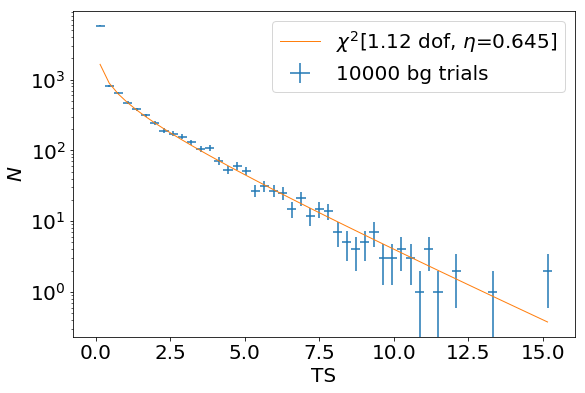

In [47]:
#plot bg distr
fig, ax = plt.subplots(figsize=(9,6))

# csky uses histlite all over the place for PDF management
# the background distribution fit integrates with histlite as well
h = bg.get_hist(bins=50)
hl.plot1d(ax, h, crosses=True, label='%i bg trials'%(bg.n_total))

# compare with the chi2 fit:
x = h.centers[0]
norm = h.integrate().values #normalization for chi-sq
ax.semilogy(x, norm * bg.pdf(x), lw=1, label=r'$\chi^2$[%.2f dof, $\eta$=%.3f]'%(bg.ndof, bg.eta))

# always label your plots, folks
ax.set_xlabel(r'TS')
ax.set_ylabel(r'$N$')
ax.legend()
plt.savefig('./plots/%s_bg_ts.png'%frbs['frb_name'][w[0]].values[0])